# ALGORITMO FUZZY C-MEANS

In [1]:
!pip install scikit-fuzzy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=12871366996e483d60da938c3f3a7ec9b6dc60dde0f10790459dd9b78bd748c0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"]=[10,7]

In [7]:
url = "social-network-ads.csv"
df = pd.read_csv(url, sep=",")
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


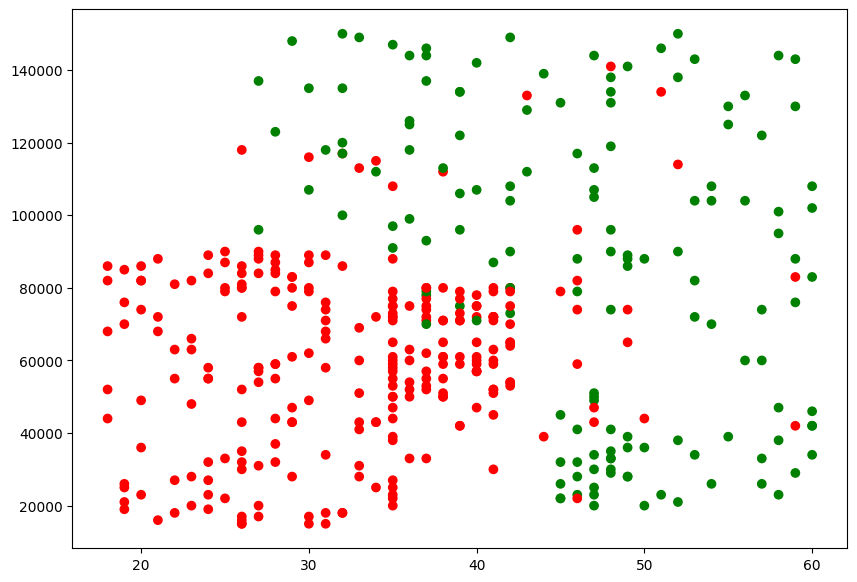

In [8]:
fig, ax = plt.subplots()
colors = {0:"red", 1:"green"}
ax.scatter(df["Age"], df["EstimatedSalary"], c=df["Purchased"].map(colors))
plt.show()

In [9]:
df_atributos = df[["Age","EstimatedSalary"]]
df_classes = df["Purchased"]

In [21]:
scaler = StandardScaler()
df_atributos = scaler.fit_transform(df_atributos)

In [35]:
# Agrupamento utilizando o algoritmo fuzzy C-means
agrupamento = fz.cmeans(data=df_atributos.T, c=2, m=2, error=0.005, maxiter=1000)

In [36]:
grau_pertinencia = agrupamento[1]

In [37]:
grau_pertinencia.shape

(2, 400)

In [38]:
grau_pertinencia[0][0]

0.20625046483114404

In [39]:
grau_pertinencia[1][0]

0.7937495351688559

In [40]:
clusters = grau_pertinencia.argmax(axis=0)

In [41]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

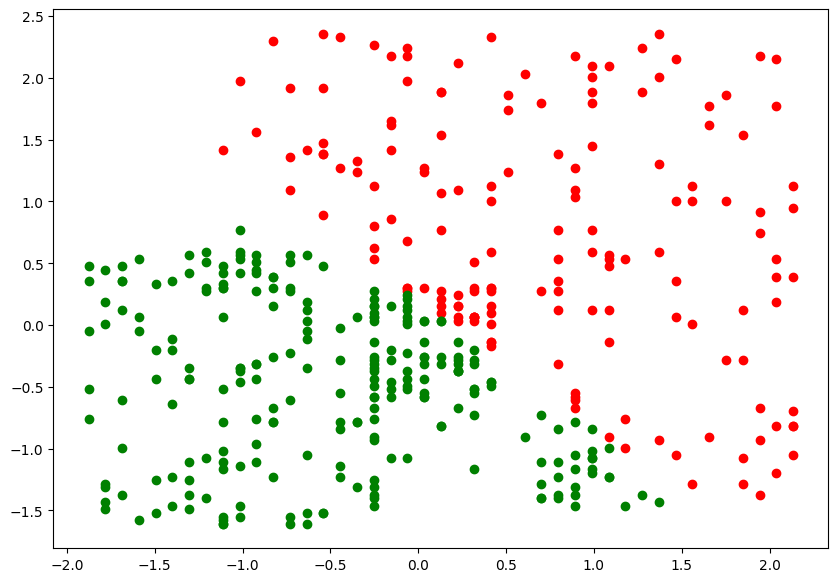

In [42]:
plt.scatter(df_atributos[clusters == 0, 0],
            df_atributos[clusters == 0, 1], c="red")
plt.scatter(df_atributos[clusters == 1, 0],
            df_atributos[clusters == 1, 1], c="green")
plt.show()

In [43]:
acuracia = accuracy_score(df_classes.array,clusters)
acuracia

0.19

In [44]:
fuzzy = np.amax(grau_pertinencia,axis=0)

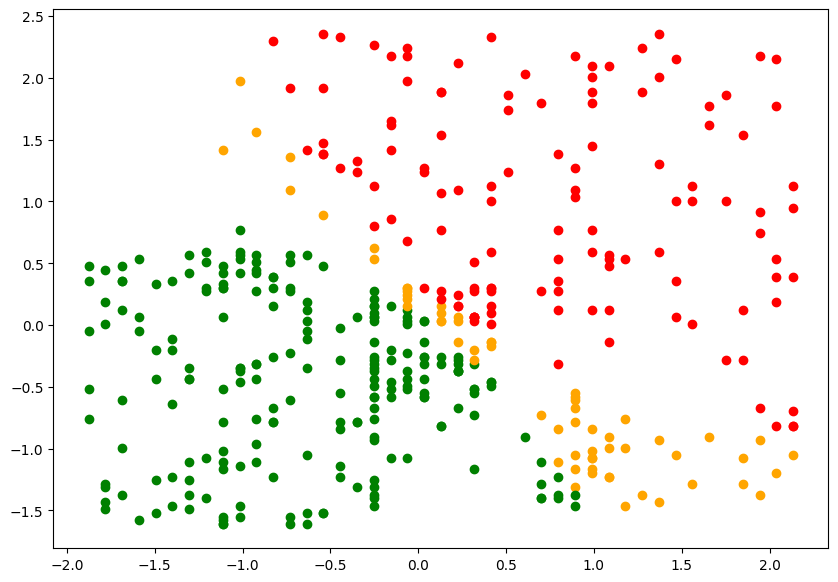

In [45]:
cores = ["red", "green", "orange"]
corte = 0.6

for i, classe in enumerate(clusters):
  if fuzzy[i] >= corte:
    plt.scatter(df_atributos[i,0],
                df_atributos[i,1], color=cores[classe])
  else:
    plt.scatter(df_atributos[i,0],
                df_atributos[i,1], color=cores[len(cores)-1])

plt.show()